### Customer Service Sentiment Prediction

An analysis on insights learned performing sentiment analysis on customer service messages on Twitter and a model that automatically detects customer emotion in on-line service interactions. 

### TOC

- Imports
- Problem Statement
- Key Terminology 
- Data Sources
- EDA
- Text Pre-Processing
- Modeling (Most importand and effective, why did they outperform others?)
- Findings 
- Limitations & Future Directions

### Problem Statement

Retail brands who receive a overwhelming number of customer service tweets weekly or daily, who use an individual employee or intern to route or answer messages, are underutilizing their staff and increasing customer response time. This matters because customers online and on Twitter expect quick response times with a friendly and effective experience.

### Key Terminology

- **Airline sentiment**: Negative/neutral/positive
- **Airline sentiment confidence**: The labelers confidence on a scale from 0-1 in their decision in labeling the emotional polarity.
- **Negative reason**: Labelers reason for deciding on polarity 
- **Negative reason confidence**: The labelers confidence on a scale from 0-1 in how confident they are in their reasoning.
- **Airline**: Airline involved in the tweet.
- **Retweet count**: Number of retweets recorded from the tweet.
- **Text**: Text of the tweet.
- **Tweet coord**: Coordinates from where the tweet was sent.
- **Tweet created**: Timestamp when the tweet was created. 
- **Tweet location**: Location scraped from profile. 
- **User Timezone**: Timezone where the tweet was sent from. 

### Data Sources

CrowdFlower scraped all tweets addressed at US arilines in the month of of February 2015, including the message. Human contributors then categorised each tweet according to the sentiment (positive, negative) from a crowsource marketplace. The dataset hosted on Kaggle and can found here, https://www.kaggle.com/crowdflower/twitter-airline-sentiment. 

### Exploratory Analysis

In [28]:
df = pd.read_csv('/Users/rashidbaset/Code/cap_project/_data/processed/text_processed.csv')

In [38]:
train = pd.read_csv('/Users/rashidbaset/Code/cap_project/_data/processed/train_set.csv')

In [39]:
def plot_sub_sentiment(Airline):
    df=train[train['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','positive'])
    plt.ylabel('Sentiment Count')
    plt.xlabel('Sentiment')
    plt.title('Count of Sentiment of '+Airline)

With around 15 percent of the target variable representing our positive binary classifier, we should question class imbalance and whether our test size is too small and consider resampling methods. Addtionally, having small sample data, we will consider simpleer models during modeling. 

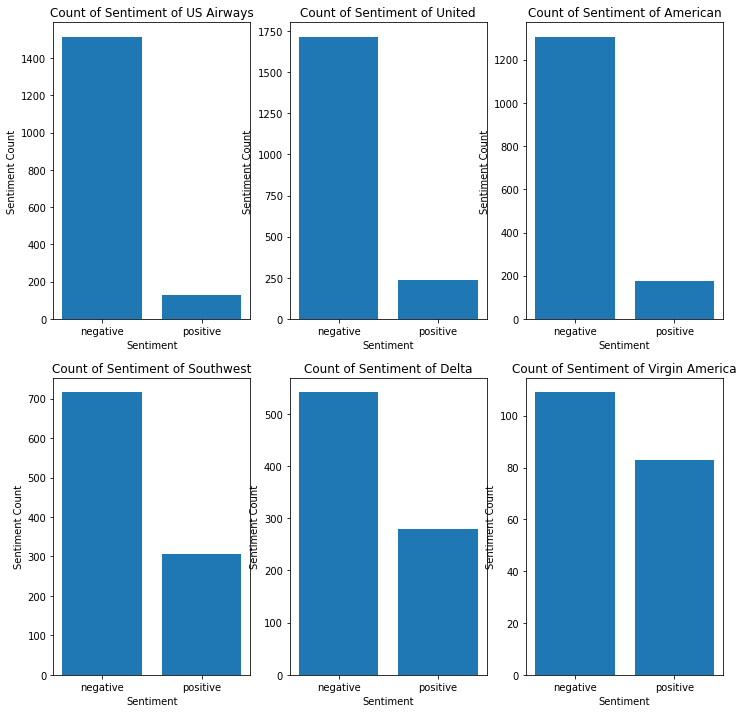

In [40]:
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

It's worth noting here that during the month of February in 2015, Delta and Southwest had more positive sentiments messaged to them proportionally than all other airlines. It's worth noting that they also thad the lease number of total messages than the rest. 

In [41]:
def NR_Count(Airline):
    if Airline=='All':
        df = train
    else:
        df = train[train['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(train['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [42]:
def plot_reason(Airline):
    df = NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

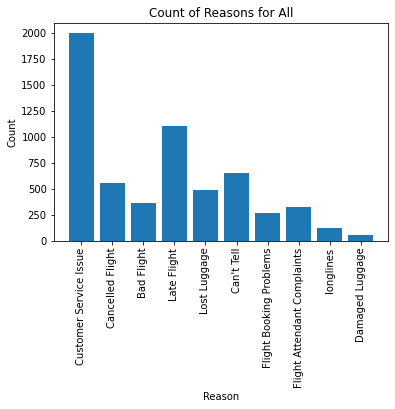

In [43]:
plot_reason('All')

As we eluded to in the EDA portion of the repo readme, customer service issue and late flight took up the top most negative reasons, with longlines and damaged luggage earning the least number of messages as a whole. The significantly more high frequency count of messages direct toward US Airways and United than the rest of the 5 airlines means that the negative reasoing are more skewed towards the labels that identify with their airline, and not representative of the population per say.

Problems plotting Virigin America

In [45]:
df=train[train['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

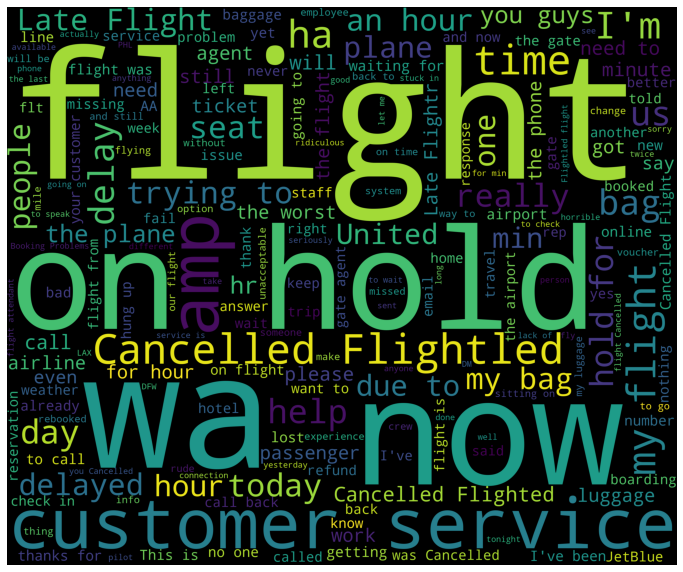

In [46]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The wordcloud above contains the negative words most often used in customer service messages for any given major US airline on Twitter in the beginning of 2015. We see continued repearrance of `customer service` with `fligt` naturally occuring the most given the industry. Aside from your ususal suspects, we see significance in the word `now` and `hold` showing an importance in immediacy and their frustrations possibly surmounting during customer service calls. There's a word `an hour` possibly relating to duration of customer service calls. 

In [47]:
new_df = train[train['airline_sentiment']=='positive']

In [48]:
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

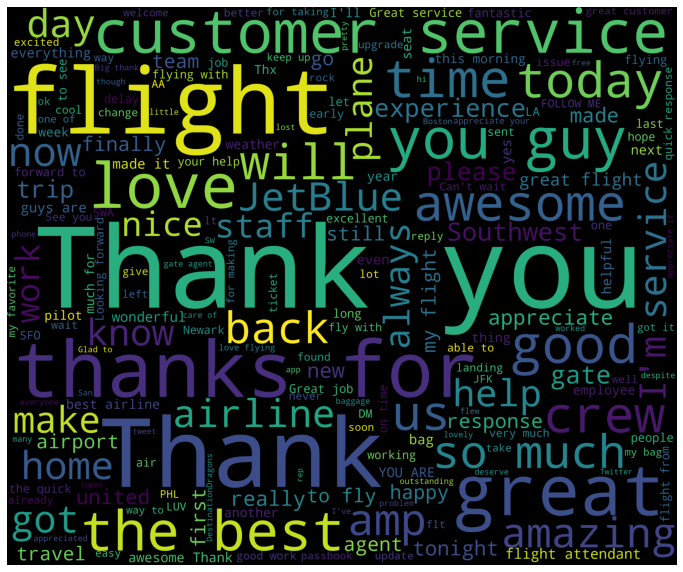

In [49]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This wordcloud contains the common word occurances for positively labeled tweets. We noticed the online iarline mentioned is JetBlue. The words `staff ` and `customer service` made a good showing and so did the world `flight` although not as signficiant.  

### Text Preprocessing

For text analysis we're interested in processing text data to convert them into something coherent for analysis. 

We followed 5 steps:

1. Tokenization 
2. Remove special characters 
3. Stemming & Lemmatization
4. Tokenization & Removing Stopwords


We started by using a list of punctuations and a TweetTokenizer library from NLTK to tokenize our messages and remove punctuation marks. PorterStemmer from NLTK was used in conjuctoin with a loop to remove stems from each word. 

The target variable was encoded numerically as either positive (1) or negative (0).

#### Count Vectorizer

CountVectorizer is both toeknziing a collection of text documents, Tweets in this case, and building a vocabulary of known words, alo encoding new documents using that vocabulary. 

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
### CountVectorizer
cv = CountVectorizer()

cv_train_features = cv.fit_transform(X_train.tokens)
cv_test_features = cv.transform(X_test)

In [51]:
stopwords_list = nltk.corpus.stopwords.words('english')

#### TFIDF 

We use TF-IDF vectorizer to take into account the frequency of a word in a given tweet and the frequency between tweets. If a word is common in most tweets it is supressed and rare words are given more influence showing they are highly specific for a tweet. 

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

### TfidfVevtorizer
tv = TfidfVectorizer(stop_words=stopwords_list)

tv_train_features = tv.fit_transform(X_train.tokens)

tv_train_features = tv.transform(X_train.tokens)
tv_test_features = tv.transform(X_test)

feature_names = tv.get_feature_names()

tfidf_df = pd.DataFrame(tv_train_features.toarray())

### Modeling

Given that this is a classification problem, we have a number of algorithms we can choose from when approaching our model. Among the classifiers, we decide to fit the following models: 

- KNN
- Logistic Regression
    - Hypterparameter, GridSearchCV
- Linear SVM
    - Hypterparameter, GridSearchCV
- Decision Tree
- Random Forest
- Gradient Boosting

When doing feature engineering, we used both Bag of Words and TF-IDF. Bag of words counts how many times a word appears in a document or talliest the count. The words allow us to compare documents and guage the similarities for different applications. TF-IDF judges the topic of an article by the words it contains. Words are givent weight and measures relevance, not frequency. Word counts in other words, are replaced with TF-IDF scores across the dataset. 

### Model Selection 

The following metrics are the performance or scores of our models: 


|                     | Bag of Words | TF-IDF |
|---------------------|--------------|--------|
| KNN                 | 72%          | 91%    |
| Logistic Regression | 94%          | 94%    |
| Linear SVM          | 93%          | 95%    |
| Decision Tree       | 91%          | 89%    |
| Random Forest       | 92.47%       | 92.54% |
| Gradient Boosting   | 91.68%       | 91.57% |

The combination of model and feature engineering algorithm that performs best is the TF-IDF version of Linear SVM. We therefore select the Linear SVM TF-IDF as the model for deployment. 



